# Aprendizaje Supervisado - Regresión

Repaso: Regresión en Machine Learning consiste en aprender etiquetas numéricas contínuas **(y)** a partir de un conjunto de atributos/features **(X)**. Estos atributos pueden ser uno, dos, o muchos más.

**Ejemplo 1:** se genera un dataset sintético unidimensional que sigue una relación lineal. Se hará la regresión usando los modelos: Regresión Lineal, Árboles de Decisión y KNN. Luego se revisará las curvas obtenidas para cada modelo y los errores.

## 1. Un atributo

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Se generan 500 puntos que siguen la función $y = 3x - 2$. Adicional se le suma *ruido* para obtener una simulación más realista.

In [58]:
n = 500
X = np.linspace(-2,3,n)
y_real = 3*X - 2

#y = y_real + 1.0*np.random.randn(n)

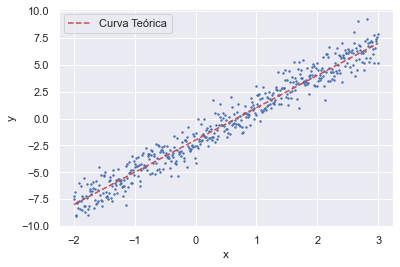

In [59]:
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Vamos a entrenar todos los modelos a la vez.

In [60]:
# 1. Definir variables predictoras y la variable a predecir
y = y_real + 1.0*np.random.randn(n)
X = X.reshape(-1,1)

# 2. Separación de los datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 1) (350,) (150, 1) (150,)


In [61]:
# 3. Instanciar modelos

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [62]:
# 4. Entrenar modelos

linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

Qué aprendieron los modelos?

Regresión lineal:

In [64]:
print(linear_model.coef_, linear_model.intercept_)

[2.94945468] -1.878796107067839


Para los demás regresores: así como los clasificadores obtienen fronteras de decisión que separan los datos, los regresores obtienen curvas que intentan aproximar los datos lo mejor posible.

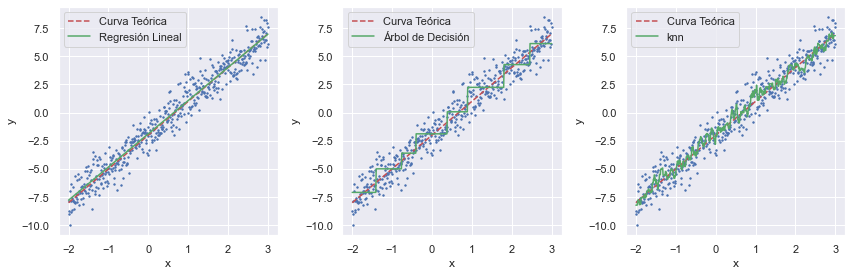

In [66]:
plt.figure(figsize = (12,4))

plt.subplot(1,3,1)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,linear_model.predict(X),label ='Regresión Lineal', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,tree_regressor.predict(X),label ='Árbol de Decisión', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,knn_regressor.predict(X),label ='knn', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

En este caso la regresión lineal hace un buen trabajo en reproducir la curva teórica. Veamos el árbol de decisión en detalle.

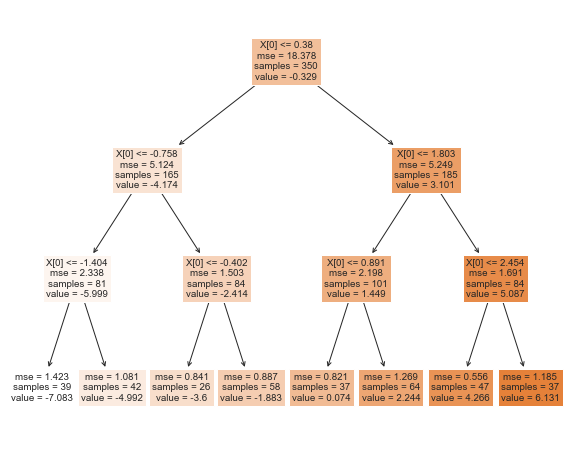

In [67]:
from sklearn import tree
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (10,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

**Para investigar:** ¿Cómo se relaciona este árbol con la curva obtenida?

A continuación los puntos
+ 5. Predecir
+ 6. Evaluar

Se hará una revisión de los errores de cada modelo. Se presentan tres aspectos:
1. Cálculo del RMSE para cada modelo (en conjuntos train y test).
1. Gráfico de dispersión de $y$ vs $y_{predicho}$ para el conjunto de test. ¿Si la regresión es buena, cerca de qué curva deberían estar los puntos?
1. Histograma de los errores ($y - y_{predicho}$) para cada conjunto.

In [68]:
import warnings
warnings.filterwarnings("ignore")

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 0.9875776850174304
Raíz del error cuadrático medio en Test: 0.9049845621673315


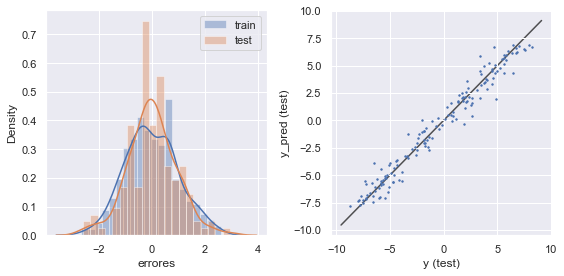

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 1.008276262055238
Raíz del error cuadrático medio en Test: 1.0485917552449935


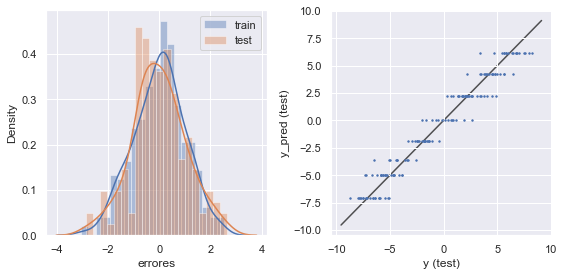

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 0.8849311296673419
Raíz del error cuadrático medio en Test: 1.002221449271401


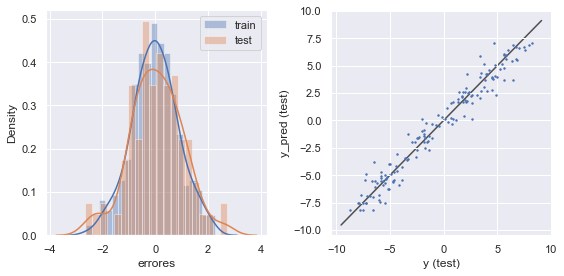

In [69]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

En todos los casos ocurre algo parecido:
1. Los errores RMSE, que representan el error global del regresor, son similares tanto para test como para train. Esto indica que no hay un gran sobreajuste.
1. Los histogramas de los errores son simétricos, aproximadamente gaussianos, y parecidos para ambos conjuntos. Esto indica que se está haciendo una aproximación correcta a los datos.
1. En el gráfico $y$ vs $y_{predicho}$ para el conjunto de test todos los puntos están cerca de la diagonal (la relación $y = x$). Esto es precisamento lo que se espera de un buen regresor. Adicional, el error parece ser similar en todo el rango de posibles valores.

**Para profundizar**: se sugiere probar distintos valores de `max_depth` y de `n_neighbors`.¿Qué ocurre cuando `n_neighbors = 1`? ¿Es posible diferenciar en el gráfico cuáles instancias se usaron para train y cuáles para test?¿Y si `n_neighbors` tiende a la cantidad de instancias en el set de entrenamiento qué sucede?

Se sugiere probar los modelos con distintas relaciones funcionales.

## 2. Dos atritutos

Dos atributos (2D) es el límite de lo que podremos visualizar. Pero esto no significa que no sea posible trabajar con más atributos.

Para este caso el análisis es similar al anterior, pero para una relación lineal con dos atributos, $y = -3x_1 + 2x_2 + 4$. Nuevamente se incluye algo de ruido.

In [76]:
# 1. Definir variables predictoras y la variable a predecir
n = 500
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = -3*x1 + 2*x2 + 4 + 0.25*np.random.randn(n)

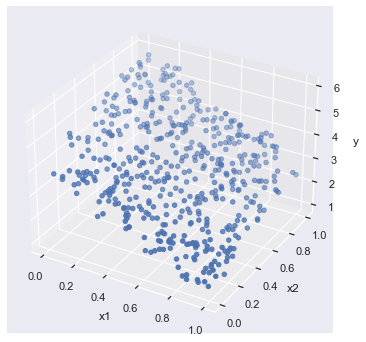

In [77]:
# Visualización de los datos generados
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(x1, x2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plot_3d_scatter(x1, x2, y, ax=None, fig = None)

In [78]:
# Creación de atributos
# Aún en punto 1. Definir variables predictoras y la variable a predecir
X = np.vstack((x1,x2)).T

# 2. Separación de los datos

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 2) (350,) (150, 2) (150,)


In [79]:
# 3. Instanciar modelos

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=2)

In [80]:
# 4. Entrenar modelos

linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

Qué aprendieron los modelos?

Regresión lineal: entrega **las pendientes** y el intercepto.

In [81]:
print(linear_model.coef_, linear_model.intercept_)

[-2.97464034  1.94547644] 3.9948793675651793


Para un caso 2D no es una curva lo que se aproxima a los datos. Es una superficie (plano).

In [82]:
# Se crea este elemento para generar fácilmente los gráficos de los planos
from matplotlib import cm

def plot_3d_regressor(x1_min, x1_max, x2_min,x2_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N) 
    x2 = np.linspace(x2_min,x2_max,N)
    X1, X2 = np.meshgrid(x1,x2)
    
    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)
    
    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.5)

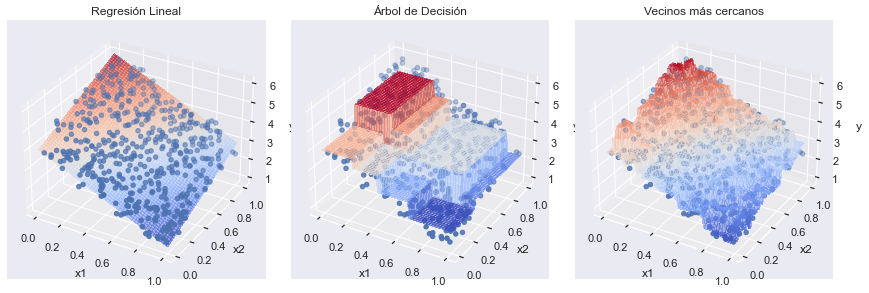

In [83]:
# Gráficos de los planos
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(131, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(0, 1, 0, 1, 100, linear_model, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

ax = fig.add_subplot(132, projection='3d')
plt.title('Árbol de Decisión')
plot_3d_regressor(0, 1, 0, 1, 100, tree_regressor, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

ax = fig.add_subplot(133, projection='3d')
plt.title('Vecinos más cercanos')
plot_3d_regressor(0, 1, 0, 1, 100, knn_regressor, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

plt.tight_layout()
plt.show()

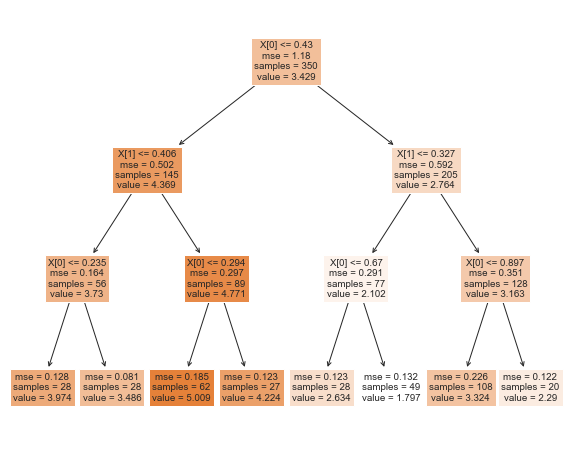

In [84]:
# Veamos qué aprendio el árbol

if tree_regressor.max_depth < 4:
    plt.figure(figsize = (10,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 0.24043063548051655
Raíz del error cuadrático medio en Test: 0.22972182863969168


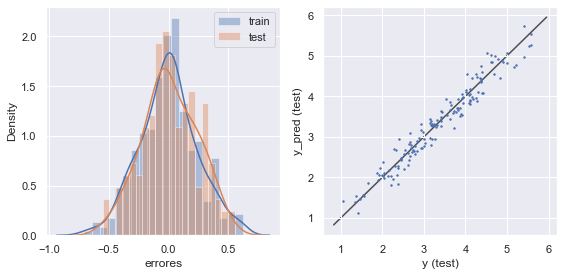

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 0.4051154459574635
Raíz del error cuadrático medio en Test: 0.5041918256722575


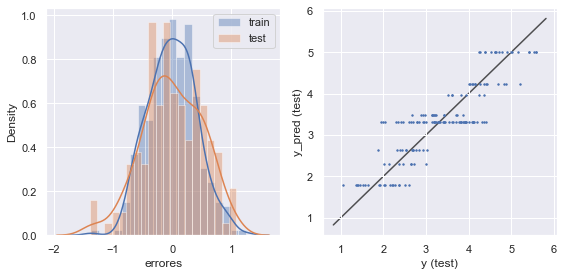

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 0.18524004306069916
Raíz del error cuadrático medio en Test: 0.2982279015793002


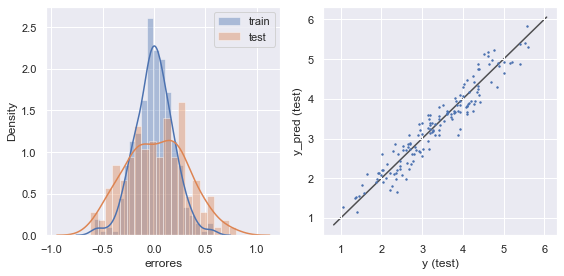

In [85]:
# Pasos 5 y 6: Predicción y evaluación

from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**Para profundizar:** se sugiere probar con distintos valores de `max_depth` y `n_neighbors`.
Igualmente se recomienda probar con otras funciones (no lineales).

## Problemas no lineales


### 1. Regresión No-Lineal

Se genera un dataset con dos atributos, $x$ e $y$, y la relación entre ellos es $y = -2x^4+3x^2+1$.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [89]:
# Se le suma ruido para tener una simulación más elaborada

n = 300
x = np.linspace(-1,1,n)
y_real = -1.5*x**4+3*x**2+1

# 1. Definición de variables predictoras y variable a predecir
y = y_real + 0.1*np.random.randn(n)
X = x.reshape(-1,1)

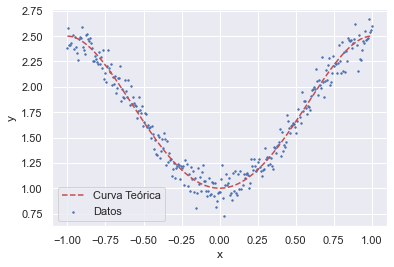

In [90]:
# Visualización de los datos generados
plt.scatter(x,y, s = 2, label = 'Datos')
plt.plot(x, y_real, '--',label ='Curva Teórica', c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [91]:
# 2. Separación de los datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [92]:
# 3. Instanciar el modelo
from sklearn.linear_model import LinearRegression
reg_1 = LinearRegression()

In [93]:
# 4. Entrenar el modelo
reg_1.fit(X_train, y_train)

LinearRegression()

In [94]:
# 5. Predecir
y_train_pred_1 = reg_1.predict(X_train)
y_test_pred_1 = reg_1.predict(X_test)

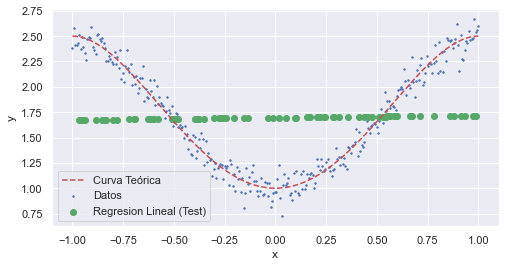

In [95]:
# Gráfico de la regresión obtenida
plt.figure(figsize = (8,4))
plt.scatter(x,y, s = 2, label = 'Datos')
plt.plot(x, y_real, '--',label ='Curva Teórica', c = 'r')
plt.scatter(X_test,y_test_pred_1,label ='Regresion Lineal (Test)', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Se observa que la regresión obtenida es un modelo malo. No captura correctamente la relación entre $x$ e $y$ (con excepción de su valor medio).

Aún así se presentarán:
+ RMSE
+ Histograma de los errores en Train y Test
+ Curva `y` vs `y_pred`

Raíz del error cuadrático medio en Train: 0.5386955343725498
Raíz del error cuadrático medio en Test: 0.49787751943413167


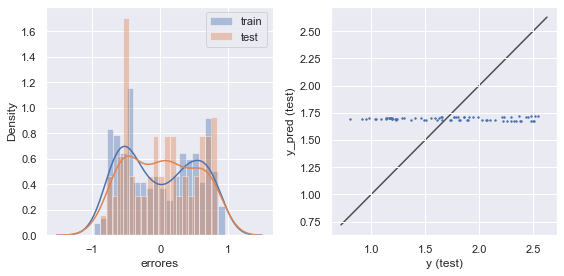

In [96]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_1))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_1, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_1, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_1, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

Para este caso el desempeño del modelo no es bueno.

Por agilidad se crea la siguiente función que sirve para evaluar los modelos de regresión.

In [97]:
def evaluar_regresion(model,x,y, X_train, X_test, y_train, y_test):
    
    # Predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Cálculo del error
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    # Gáficos de resultados
    plt.figure(figsize = (12,4))
    plt.subplot(1,3,1)
    plt.scatter(x,y, s = 2, label = 'Datos')
    plt.plot(x, y_real, '--',label ='Curva Teórica', c = 'r')
    
    list1, list2 = zip(*sorted(zip(X_train[:,0], y_train_pred)))
    plt.plot(list1, list2,label ='Regresión (train)')
    
    list1, list2 = zip(*sorted(zip(X_test[:,0], y_test_pred)))
    plt.plot(list1, list2,label = 'Regresión (test)')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()


    plt.subplot(1,3,2)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,3,3)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

### 1.2 Atributos Polinómicos


Se agregarán al dataset nuevos atributos polinómicos: $x^2, x^3$ y $x^4$. Luego se hace un nuevo ajuste a la regresión lineal.

Cada atributo se agrega de forma individual. Al agregar un atributo nuevo, ¿qué ocurre con la regresíon lineal?

Regresión de grado 1
Se adicionan atributos hasta la potencia x**1
Coeficientes : [0.0223363] 
Intercepto : 1.6951719626087085 
Raíz del error cuadrático medio en Train: 0.5386955343725498
Raíz del error cuadrático medio en Test: 0.49787751943413167


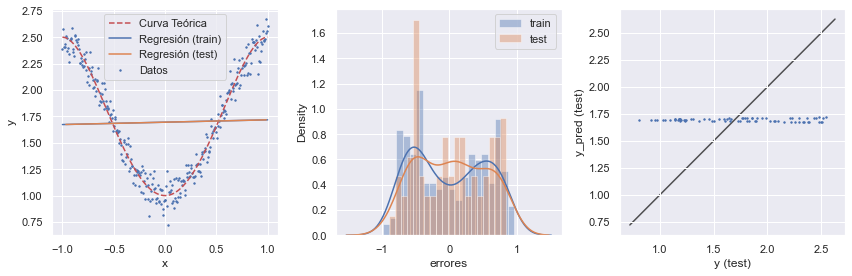

Regresión de grado 2
Se adicionan atributos hasta la potencia x**2
Coeficientes : [-0.00242176  1.70143641] 
Intercepto : 1.1239091472272325 
Raíz del error cuadrático medio en Train: 0.15450302989439263
Raíz del error cuadrático medio en Test: 0.1582878045174462


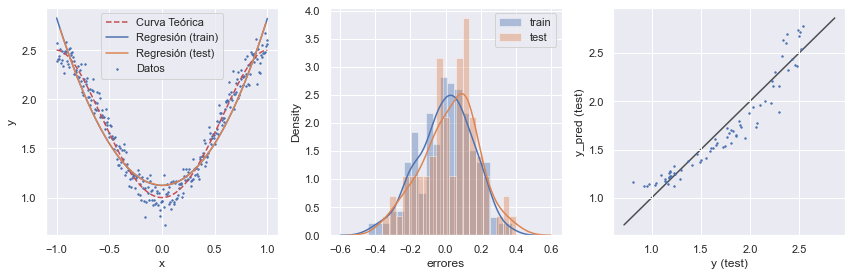

Regresión de grado 3
Se adicionan atributos hasta la potencia x**3
Coeficientes : [-0.03015837  1.70142655  0.04547561] 
Intercepto : 1.1237645406291281 
Raíz del error cuadrático medio en Train: 0.15435224408177411
Raíz del error cuadrático medio en Test: 0.15860885836765604


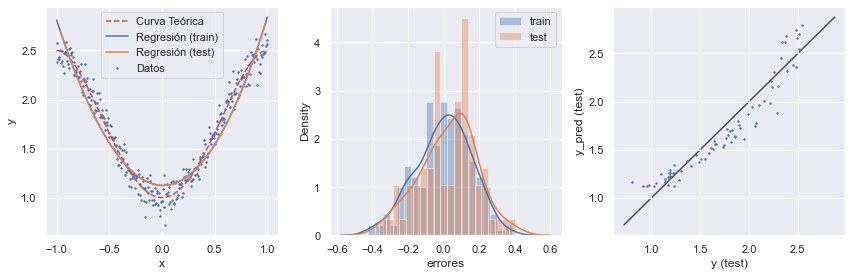

Regresión de grado 4
Se adicionan atributos hasta la potencia x**4
Coeficientes : [-0.02371246  3.03511125  0.03426808 -1.56039699] 
Intercepto : 0.9955567586051419 
Raíz del error cuadrático medio en Train: 0.09638337078837883
Raíz del error cuadrático medio en Test: 0.08837573805778938


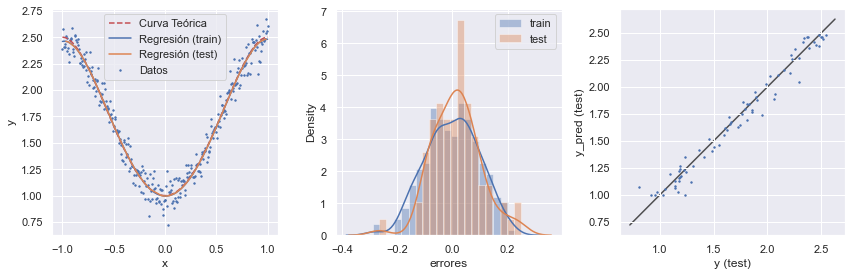

Regresión de grado 5
Se adicionan atributos hasta la potencia x**5
Coeficientes : [ 0.02362685  3.03509683 -0.18311515 -1.55991101  0.19412244] 
Intercepto : 0.9956457611748377 
Raíz del error cuadrático medio en Train: 0.09607540800574123
Raíz del error cuadrático medio en Test: 0.08780376468859201


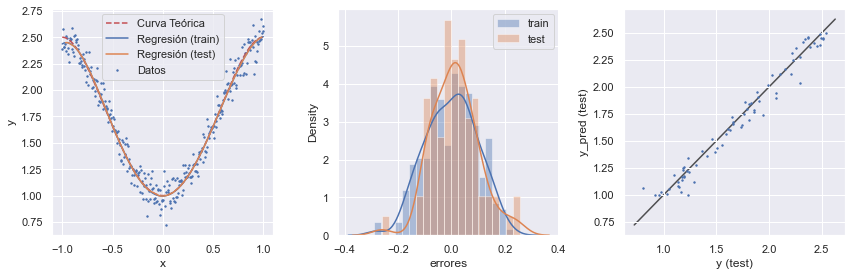

In [100]:
for idx,potencia_maxima in enumerate(range(1,6)):
    print(f'Regresión de grado {idx + 1}')
    print(f'Se adicionan atributos hasta la potencia x**{potencia_maxima}')
    
    # 1. Definir variables predictoras y variable a predecir
    X = x.reshape(-1,1)
    for potencia in range(2,potencia_maxima+1):
        X = np.hstack((X,(x**potencia).reshape(-1,1)))
    #print(f'Los atributos tienen shape: {X.shape}')
    
    # 2. Separación de los datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)
    
    # 3. Instanciar el modelo
    reg = LinearRegression()
    
    # 4. Entrenar el modelo
    reg.fit(X_train, y_train)
    
    print('Coeficientes : {} '.format(reg.coef_))
    print('Intercepto : {} '.format(reg.intercept_))
    
    # 5. Predecir   6. Evaluar
    evaluar_regresion(reg, x,y, X_train, X_test, y_train, y_test)

**Nota:** recordar que es una buena práctica estandarizar los datos (normalizar) antes de entrenar una regresión lineal.

**Para profundizar:** ¿Por que no parece haber cambios entre el segundo y el tercer gráfico?¿Y entre el cuarto y el quinto?

Al agregar nuevos atributos no solamente podemos considerar las potencias de cada atributo, sino también variadas interacciones. Ejemplo: $x_1 x_2$.

## 2. `PolynomialFeatures`

En la práctica no se adicionan atributos polinómicos como se hizo en el ejemplo anterior. Es posible usar la clase `PolynomialFeatures` de Scikit-Learn. Se sugiere revisar su documentación y utilizarla en los ejemplos prácticos.

Tener en cuenta que en estos ejercicios conocemos la forma real de los datos (el polinomio) porque los generamos nosotros. En la realidad ese polinomio no se conoce, por lo que el grado máximo a incoporar es un hiperparámetro.

In [115]:
# Se importa la clase PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

In [116]:
# Se define nuevamente X
X = x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)

In [117]:
# Se crea un objeto a partir de `PolynomialFeatures` de suficiente `degree` para el problema
poly = PolynomialFeatures(7, include_bias=False)

# Se aplica sobre `X_train` e `X_test`.
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)

# Se revisa el `shape` de los nuevos conjuntos obtenidos
print(X_train_new.shape, X_test_new.shape)

(225, 7) (75, 7)


4. Entrena una regresión lineal, observa los coeficientes obtenidos, y predice sobre el conjunto de Train y de Test.

In [118]:
# Instanciar el modelo    
reg_2 = LinearRegression()
# Entrenar el modelo
reg_2.fit(X_train_new, y_train)
print(reg_2.coef_, reg_2.intercept_)
#Predecir
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)

[-0.05365349  3.21731805  0.51608864 -2.09177159 -1.32318848  0.38331588
  0.92613217] 0.9870910312740457


Raíz del error cuadrático medio en Train: 0.09536492616285391
Raíz del error cuadrático medio en Test: 0.08919871982119648


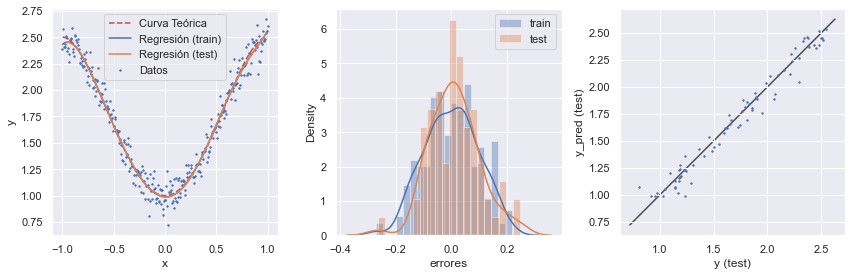

In [119]:
# Evaluación del modelo
evaluar_regresion(reg_2, x,y, X_train_new, X_test_new, y_train, y_test)

### 3. Regularización

De forma muy general se puede decir que es una técnica usada para evitar el overfitting. Se sugiere profundizar la definición.

Los ejemplos anteriores son muy sencillos. Considerar:
1. La relación entre los atributos y la variable a predecir es un polinomio de grado relativamente bajo, y es una relación conocida.
2. Únicamente se tiene una variable predictora `(x)` cuando en realidad se puede tener más de un atributo.
3. No siempre se sabe hasta qué grado generar atributos. Tampoco se sabe si usar interraciones entre ellos.
4. La relación entre $x$ y $y$ no siempre es un polinomio. Muchas veces directamente nose sabe qué tipo de relación es.

Sin embargo, los polinomios suelen ser una buena aproximación a otras funciones. Si no funciona este método, es posible generar **atributos que no sean polinómicos.** Se sugiere investigar y profundizar este tema.

En lo referente al grado hasta el cual se agregan atributos, hay una técnica que permite controlar el error (si nos estamos pasando). Esta técnica se llama **Regularización.** En este caso veremos solo una introducción a este concepto.

Vamos a usar de referencia el modelo que entrenaste en la sección anterior. Por las dudas, lo vamos a dejar entrenado nuevamente aquí. Es importante que prestes atención a los coeficientes de esta regresión lineal.

Raíz del error cuadrático medio en Train: 0.09536492616285391
Raíz del error cuadrático medio en Test: 0.08919871982119648


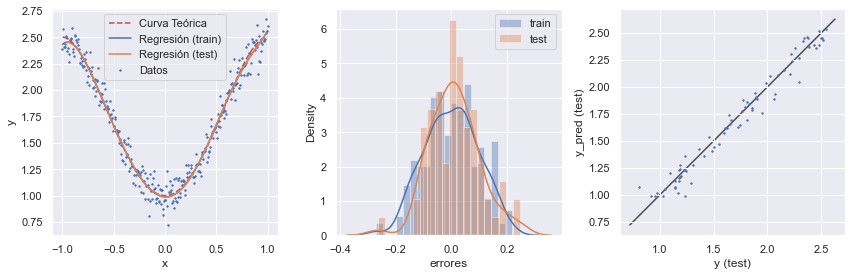

In [120]:
poly = PolynomialFeatures(degree = 7, include_bias=False) ### ACA TENDRAS QUE MODIFICAR MAS ADELANTE
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)

reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train)

evaluar_regresion(reg_2, x,y, X_train_new, X_test_new, y_train, y_test)

Ahora se hará el entrenamiento de dos regresiones sobre el mismo dataset, pero con regularización. Esto se hará con las clases `Ridge` y `Lasso` de Scikit-Learn.

Se empieza entrenando el modelo `Ridge`. Presta atención a sus coeficientes:

In [122]:
from sklearn.linear_model import Ridge, Lasso

reg_ridge = Ridge(alpha= 0.1)
reg_ridge.fit(X_train_new,y_train)

print(f'Coeficientes: {reg_ridge.coef_}')
print(f'Intercepto: {reg_ridge.intercept_}')

Coeficientes: [ 0.00839634  2.52299641 -0.07015512 -0.37101013 -0.03751237 -0.72358608
  0.13765808]
Intercepto: 1.0308218731614156


Raíz del error cuadrático medio en Train: 0.09925707869405277
Raíz del error cuadrático medio en Test: 0.09394142270805379


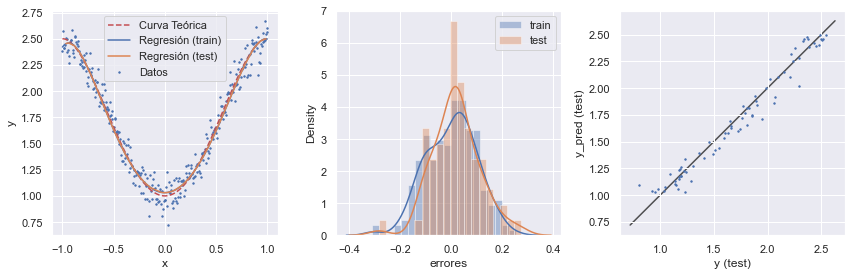

In [123]:
evaluar_regresion(reg_ridge, x,y, X_train_new, X_test_new, y_train, y_test)

**Para profundizar:** modificar el valor de `alpha` y observa su efecto. ¿Cómo cambian los coeficientes? **Tip:** varía en órdenes de magnitud,  (10, 5, 1, 0.5, 0.1 ,0.01, 0.005, 0.001, etc.).

Ahora, el modelo `Lasso`:

In [124]:
reg_lasso = Lasso(alpha = 0.001)
reg_lasso.fit(X_train_new,y_train)
print(reg_lasso.coef_, reg_lasso.intercept_)

[-2.24534327e-03  2.35671389e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -9.33973938e-01  3.74814905e-03] 1.0415768965014838


Raíz del error cuadrático medio en Train: 0.10184004835551706
Raíz del error cuadrático medio en Test: 0.09717044461158324


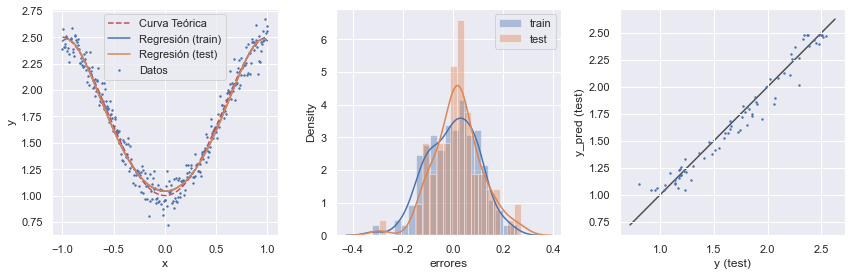

In [125]:
evaluar_regresion(reg_lasso, x,y, X_train_new, X_test_new, y_train, y_test)

**Para profundizar:** nuevamente modificar el valor de `alpha` y observar su efecto. ¿Cómo cambian los coeficientes?¿Hay alguna diferencia con el modelo `Ridge`? **Tip:** Hay una diferencia importante que hace que la regresión `Lasso` sea muy apreciada.

**¿Qué pasa por fuera del rango de entrenamiento?**

Se está entrenando una regresión en un rango de $x$ entre -1 y 1. ¿Pero qué pasa si entrenamos en ese rango, y queremos ver cómo es la regresión por fuera (valores mayores a 1, y valores menores a -1)?

A continuación se usan los modelos obtenidos para predecir por fuera del rango inicial.

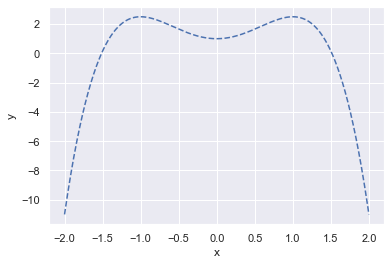

In [126]:
x_nuevo_rango = np.linspace(-2,2,1000)
# Se reemplazan en los valores x del polinomio inicial y_real = -1.5*x**4+3*x**2+1
y_nuevo_rango = -1.5*x_nuevo_rango**4+3*x_nuevo_rango**2+1

plt.plot(x_nuevo_rango, y_nuevo_rango, '--')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [127]:
X_nuevo_rango = poly.fit_transform(x_nuevo_rango.reshape(-1,1))

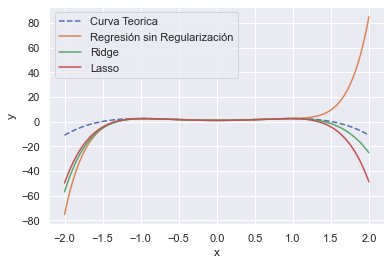

In [128]:
plt.plot(x_nuevo_rango, y_nuevo_rango, '--', label = 'Curva Teorica')
plt.plot(x_nuevo_rango, reg_2.predict(X_nuevo_rango), label = 'Regresión sin Regularización')
plt.plot(x_nuevo_rango, reg_ridge.predict(X_nuevo_rango), label = 'Ridge')
plt.plot(x_nuevo_rango, reg_lasso.predict(X_nuevo_rango), label = 'Lasso')
plt.legend()

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Se recomienda tener cuidado cuando se usa un modelo de regresión entrenado en un rango, y se hacen predicciones por fuera de ese rango. Aunque no es algo común, es importante tenerlo en cuenta.

Si bien todos los modelos dan resultados muy parecidos, recordar que para este caso la relación funcional de los datos es conocida (polinomio de grado 4). Al agregar atributos se está llevando a grado 7, que no es mucho más grande que el grado original. 

**Para profundizar:** para identificar el verdadero efecto de la regularización, agregar atributos polinómicos hasta un grado alto, por ejemplo 50, 100, 150 ó más. Correr la regresión sin regularización, y la regresión Ridge y Lasso, y verificar qué sucede. Adicional se puede volver a probar con valores nuevos de `alpha`.


## Conclusiones

>Es posible ajustar relaciones no-lineales con un modelo lineal. Pero esto implica agregar nuevos atributos. Esta situación, además de hacer crecer el dataset, introduce un nuevo hiperparámetro: el grado hasta el cual agregar atributos. Esto se soluciona parcialmente con regularización, pero eso implica otro hiperparámetro: la fuerza de la regularización ( $\alpha$). Adicional, los hiperparámetros que acabamos de mencionar de alguna forma interactuan: mientras más atributos sean agregados, $\alpha$ probablemente deba tomar otro valor.